# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import matplotlib as plt
import random
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def dice(n):
 numberList = [i for i in range (n) ]
 lista=[]
 for i in range (n):
     a = lista.append(random.choice(numberList))
     d = {'outcome_number':[random.randrange(1,10) for i in range(n)] }
     df = pd.DataFrame(data=d , index=[i for i in range (n) ])
     
 return df

#### 2.- Plot the results sorted by value.

,# of rolling attemp,outcome_number
4,4,2
5,5,2
2,2,3
7,7,3
9,9,3
1,1,4
3,3,4
0,0,8
8,8,8
6,6,9


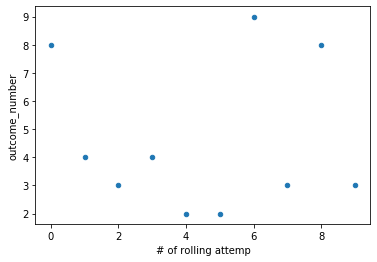

In [3]:
# your code here
rep = dice(10) #10 times rolling

rep = rep.reset_index().sort_values(by=['outcome_number'], ascending= True)
rep.rename(columns={"index": "# of rolling attemp"}, inplace = True)
display(rep)
rep.plot(x= '# of rolling attemp' , y = 'outcome_number' , kind= 'scatter')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e47f01d0>,
      dtype=object)

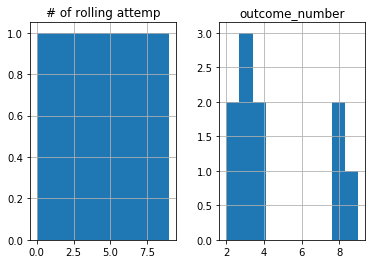

In [4]:
# your code here

rep.hist()



In [5]:
"""
your comments here

Both graphs show the same value as we are representing the frequency distribution of rolling 10 time a dice.
It shows how many times a number comes out after 10 rolls

"""

'\nyour comments here\n\nBoth graphs show the same value as we are representing the frequency distribution of rolling 10 time a dice.\nIt shows how many times a number comes out after 10 rolls\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def mean(rep):
    
    mean = rep['outcome_number'].sum() /  len(rep['outcome_number'])
                                              
    return mean

In [7]:
mean(rep)

4.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def freq(rep):
 freq = rep['outcome_number'].value_counts() 
 mean = sum(rep['outcome_number'].value_counts() ) / len(rep['outcome_number'].value_counts() )
 return f'This is the freq distribution:',freq , f'This is the mean of the freq distribution:',mean

In [9]:
freq(rep)

('This is the freq distribution:',
 3    3
 8    2
 4    2
 2    2
 9    1
 Name: outcome_number, dtype: int64,
 'This is the mean of the freq distribution:',
 2.0)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here

def median(rep):
    n_num = rep['outcome_number']
    #print(n_num)
    n = len(n_num) 
     

    if n % 2 == 0: 
        median1 = n_num[n//2] 
        median2 = n_num[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = n_num[n//2] 
    #print("Median is: " + str(median)) 
    return print(median-1)

In [11]:
median(rep)

1.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
# your code here

samples = sorted(rep['outcome_number'])

def find_median(sorted_list):
    indices = []

    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass

median, median_indices = find_median(samples)
Q1, Q1_indices = find_median(samples[:median_indices[0]])
Q2, Q2_indices = find_median(samples[median_indices[-1] + 1:])

quartiles = [Q1, median, Q2]

print("(Q1, median, Q3): {}".format(quartiles)) 



(Q1, median, Q3): [2.5, 3.5, 8.0]


In [13]:
print(f'Comprobación' ,rep['outcome_number'].describe()) # the function does not provide high acuracy

Comprobación count    10.000000
mean      4.600000
std       2.674987
min       2.000000
25%       3.000000
50%       3.500000
75%       7.000000
max       9.000000
Name: outcome_number, dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

count    100.000000
mean       3.740000
std        1.703354
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: value, dtype: float64

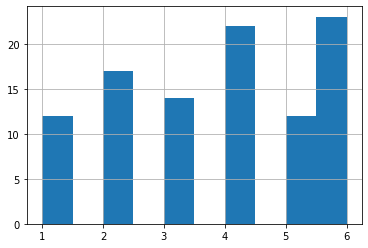

In [14]:
# your code here

data = pd.read_csv("/home/jc/Escritorio/Github_labs/dataptmad0420/module-2/descriptive-stats/data/roll_the_dice_hundred.csv")


data = data.sort_values(by=['value'], ascending= False)
display(data['value'].describe())

data.describe()

#data.plot(x = 'roll' , y='value' , kind= 'scatter', figsize= (10,10))

data['value'].hist()

In [15]:
"""
your comments here

Out of 100 attemps , number 4 & 6 are the most frequent

"""

'\nyour comments here\n\nOut of 100 attemps , number 4 & 6 are the most frequent\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
# your code here

def mean(data):
    
    mean = data['value'].sum() /  len(data['value'])
                                              
    return mean

In [17]:
mean(data)

3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here

def freq(data):
 freq = data['value'].value_counts() 
 mean = sum(data['value'].value_counts() ) / len(data['value'].value_counts() )
 return f'This is the freq distribution:',freq , f'This is the mean of the freq distribution:',mean

In [19]:
freq(data)

('This is the freq distribution:',
 6    23
 4    22
 2    17
 3    14
 5    12
 1    12
 Name: value, dtype: int64,
 'This is the mean of the freq distribution:',
 16.666666666666668)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

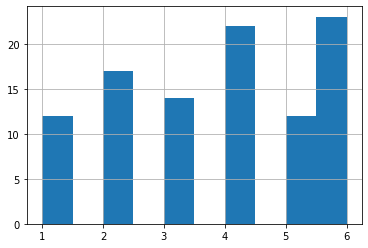

In [20]:
# your code here

data['value'].hist()

In [21]:
"""
your comments here

The mean does not give that many info as you already know that a dice has 6 faces so the mean will be close to 3.5. If there are more outcomes bigger that 3 , the average will increase otherwise it will decrease
"""

'\nyour comments here\n\nThe mean does not give that many info as you already know that a dice has 6 faces so the mean will be close to 3.5. If there are more outcomes bigger that 3 , the average will increase otherwise it will decrease\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

count    1000.000000
mean        3.447000
std         1.711175
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: value, dtype: float64

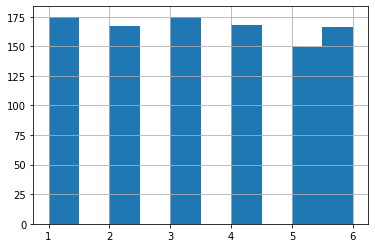

In [22]:
# your code here

data = pd.read_csv("/home/jc/Escritorio/Github_labs/dataptmad0420/module-2/descriptive-stats/data/roll_the_dice_thousand.csv")
data = data.sort_values(by=['value'], ascending= False)
display(data['value'].describe())

data.describe()

#data.plot(x = 'roll' , y='value' , kind= 'scatter', figsize= (10,10))

data['value'].hist()

In [23]:
"""
your comments here

As we can see above the values obtained is similar across the dataset. The more times we roll the dice the more likely we values will compensate
"""

'\nyour comments here\n\nAs we can see above the values obtained is similar across the dataset. The more times we roll the dice the more likely we values will compensate\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

Guess: mean = 40 & St = 1.5


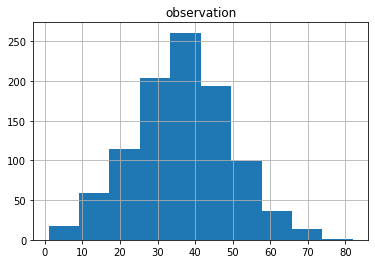

In [24]:
# your code here

data = pd.read_csv("/home/jc/Escritorio/Github_labs/dataptmad0420/module-2/descriptive-stats/data/ages_population.csv")
                   
#data = data.sort_values(by=['value'], ascending= False)
#display(data['value'].describe())


data.head()

data.hist()

print('Guess: mean = 40 & St = 1.5')

#data.plot(x = 'roll' , y='value' , kind= 'scatter', figsize= (10,10))

#data['value'].hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [25]:
# your code here

print(f'mean:',data.mean())
print(f'std:',data.std())


mean: observation    36.56
dtype: float64
std: observation    12.8165
dtype: float64


In [26]:
"""
your comments here

The mean was close to the one I said but definetely I was wrong about Std
"""

'\nyour comments here\n\nThe mean was close to the one I said but definetely I was wrong about Std\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e467fba8>]],
      dtype=object)

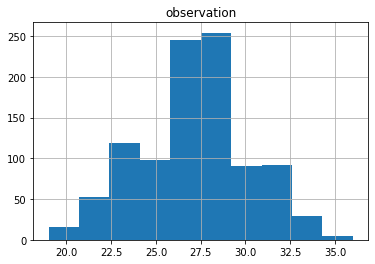

In [27]:
# your code here

data = pd.read_csv("/home/jc/Escritorio/Github_labs/dataptmad0420/module-2/descriptive-stats/data/ages_population2.csv")
                   
#data = data.sort_values(by=['value'], ascending= False)
#display(data['value'].describe())


data.head()

data.hist()


#data.plot(x = 'roll' , y='value' , kind= 'scatter', figsize= (10,10))

#data['value'].hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
your comments here

Definetely, this dataset is not equally distributed. Values 26 to 28 are the most repeated. This will affect the std and mean
"""

'\nyour comments here\n\nDefinetely, this dataset is not equally distributed. Values 26 to 28 are the most repeated. This will affect the std and mean\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [29]:
# your code here
print(f'mean:',data.mean())
print(f'std:',data.std())

mean: observation    27.155
dtype: float64
std: observation    2.969814
dtype: float64


In [30]:
"""
your comments here

The second plot tells us that the values are less disperse in the dataset (more concentrated).
This neighbourhood is quite young, average of 27 years old
"""

'\nyour comments here\n\nThe second plot tells us that the values are less disperse in the dataset (more concentrated).\nThis neighbourhood is quite young, average of 27 years old\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e4461eb8>]],
      dtype=object)

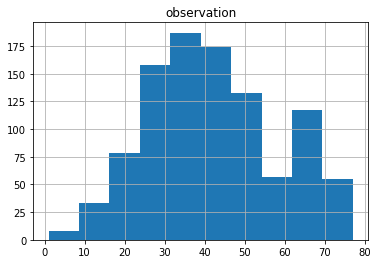

In [31]:
# your code here

data = pd.read_csv("/home/jc/Escritorio/Github_labs/dataptmad0420/module-2/descriptive-stats/data/ages_population3.csv")
                   
#data = data.sort_values(by=['value'], ascending= False)
#display(data['value'].describe())


data.head()

data.hist()



#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here

# your code here
print(f'mean:',data.mean())
print(f'std:',data.std())

mean: observation    41.989
dtype: float64
std: observation    16.144706
dtype: float64


In [33]:
"""
your comments here

We can see that the values are moving to the right, which means that they are moving towards the third quantile
"""

'\nyour comments here\n\nWe can see that the values are moving to the right, which means that they are moving towards the third quantile\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [34]:
# your code here


print(f'lenght of dataset:', len(data))

print(f'1 quantile:',np.percentile(data, 0))  
print(f'2 quantile:',np.percentile(data, 25))  
print(f'3 quantile:',np.percentile(data, 50))  
print(f'4 quantile:',np.percentile(data, 75))  
print(f'5 quantile:',np.percentile(data, 100))



print(f'mean:',data.mean())
print(f'median:',data.median())

lenght of dataset: 1000
1 quantile: 1.0
2 quantile: 30.0
3 quantile: 40.0
4 quantile: 53.0
5 quantile: 77.0
mean: observation    41.989
dtype: float64
median: observation    40.0
dtype: float64


In [35]:
"""
your comments here

The difference between median and mean is almost 2 points. This means that the value 40 splits the dataset in 2 equal parts. 
"""

'\nyour comments here\n\nThe difference between median and mean is almost 2 points. This means that the value 40 splits the dataset in 2 equal parts. \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here

display(data.describe()) #thos table gives us the quantiles

print(f'Percentile 30:' , np.percentile(data, 30)) 
print(f'Percentile 45:' ,np.percentile(data, 45)) 


,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


Percentile 30: 32.0
Percentile 45: 38.0


In [37]:
"""
your comments here

Deep diving on the data frequency we can state that on the third neighbourhood respondants are older than neighbourhood 2 or 1.
"""

'\nyour comments here\n\nDeep diving on the data frequency we can state that on the third neighbourhood respondants are older than neighbourhood 2 or 1.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'